# 1 - Perkenalan

Nama Peneliti : Suma Bimantoro Andru

Objecktive: Telco Customer Churn

Dataset:Telco Customer Churn

# 2 - Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OrdinalEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import preprocessing
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras import Model 
import tensorflow as tf
from tensorflow import keras
import pickle
import requests
import json
import requests

# 3 - Data Loading

In [2]:
#connect G Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data Loading

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phase2/milsetone1 phase 2/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
data.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
# Duplicate Dataset

data_copy = data.copy()

In [7]:
#tampilkan informasi untuk melihat field
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<p>Di dataset ini ada <b>21</b> columns dan <b>7042</b> row, tipe data <b>int,objec dan float</b></p>

# 4 - EDA

In [8]:
#check dataset
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Pelanggan terdiri dari `mayoritas` adalah pelanggan `tidak lanjut usia` dan rata-rata langganan perbulan dengan nilai <b>70.350000</b>

<b><h1>Churn</h1><b>

Apakah pelanggan churn atau tidak `(Ya atau Tidak)`

In [9]:
#cek Feature
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Tidak ada data aneh selain yes dan no, pelanggan `churn adalah dimana pelanggan stop untuk langganan` 

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

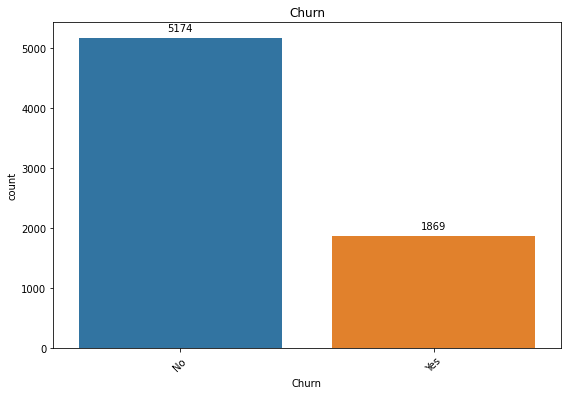

In [10]:
#membuat plot untuk cek Churn
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
DEATH_EVENT = sns.countplot(x='Churn', data=data, order=data.Churn.value_counts().index)
for p in DEATH_EVENT.patches:
    DEATH_EVENT.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Churn')
plt.xlabel('Churn')
plt.ylabel('count')
plt.xticks(rotation=45)

Data target terlihat `imbalance`, tetapi terlihat bagus dikarenakan lebih banyak yang tidak churn :)

In [11]:
#melihat jumlah dan persen terhadap column DEATH_EVENT
(data['Churn'].value_counts()/data['Churn'].count())*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

ada 73% costumer `bertahan` dan 26% costumer `churn`

<b><h1>gender</h1></b>

In [12]:
#cek Feature
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

Column gender adalah column jenis kelamin perempuan atau laki-laki

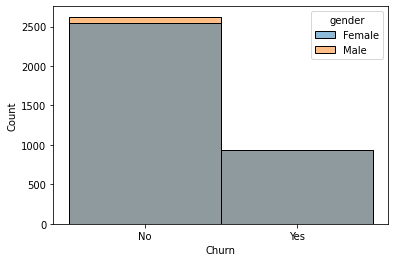

In [13]:
#membuat histplot
sns.histplot(data=data, x="Churn", hue="gender")

Disini terlihat  female banyak di churn dan tidak di churn,
sepertinnya column ini sedikit corelasi dengan churn

In [14]:
#melihat jumlah dan persen terhadap column DEATH_EVENT
(data['gender'].value_counts()/data['gender'].count())*100

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

di data ada 50% male dan 49% perempuan

<h1><b>SeniorCitizen</b></h1>

Apakah pelanggan adalah warga lanjut usia atau tidak (1, 0)

In [15]:
#cek Feature
data['SeniorCitizen'].unique()

array([0, 1])

Tidak ada data aneh <b>selain 0 dan 1</b>, data ini bersifat `categori` dimana `0 adalah bukan lanjut usia dan 1 adalah usia lanjut usia`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


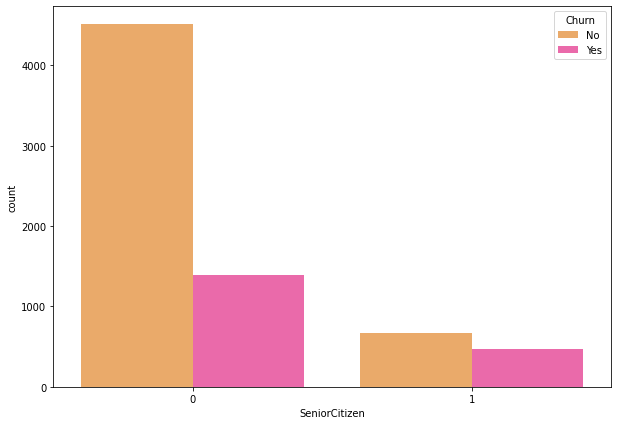

In [16]:
#show hist SeniorCitizen
plt.figure(figsize=(10,7))
sns.countplot('SeniorCitizen', hue= 'Churn', data=data, palette='spring_r')
plt.show()

Terlihat ada pergerakan dari boxplot jika lanjut usia maka makin kemungkinan akan churn

<b><h1>Partner</h1></b>

Apakah pelanggan memiliki pasangan atau tidak (Ya, Tidak)

In [17]:
#cek Feature
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

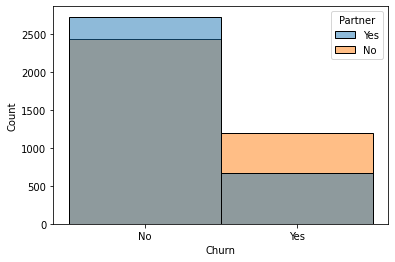

In [18]:
#membuat histplot
sns.histplot(data=data, x="Churn", hue="Partner")

tidak ada perbedaan significan pasangan berpartner adalah alasan pelanggan akan churn atau tidak

<b><h1>Dependents</h1></b>

Apakah pelanggan memiliki tanggungan atau tidak (Ya, Tidak)

In [19]:
#cek Feature
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

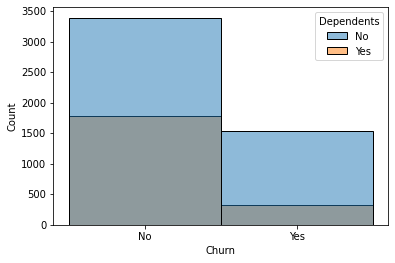

In [20]:
#membuat histplot
sns.histplot(data=data, x="Churn", hue="Dependents")

tidak ada perbedaan significan dari pelanggan yang mempunyai `tanggungan atau tidak` dan <b>menjadi alasan pelanggan akan churn atau tidak</b>

<h1><b>tenure</h1></b>

Jumlah bulan pelanggan telah tinggal di perusahaan

In [21]:
#cek Feature
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

Text(0, 0.5, 'tenure')

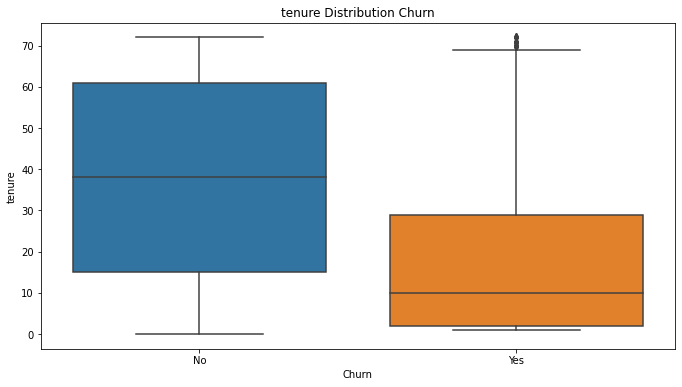

In [22]:
#Membuat Boxplot
plt.figure(figsize=(25,6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('tenure Distribution Churn')
plt.xlabel('Churn')
plt.ylabel('tenure')

Tenure terlihat dari `BOX PLOT adanya pergerakan`, yang dimana artinnya ada corelasi tinggi antara `tenure dan churn`,
dimana `makin lama tenure makin kecil potensi untuk menjadi churn`

<h1>PhoneService,MultipleLines,OnlineBackup,DeviceProtection</h1>

<li>PhoneService:Apakah pelanggan memiliki layanan telepon atau tidak (Ya, Tidak)
<li>MultipleLines:Apakah pelanggan memiliki banyak saluran atau tidak (Ya, Tidak, Tidak ada layanan telepon)
<li>OnlineBackup:Apakah pelanggan memiliki backup online atau tidak (Ya, Tidak, Tidak ada layanan internet).
<li>DeviceProtection:Apakah pelanggan memiliki perlindungan perangkat atau tidak (Ya, Tidak, Tidak ada layanan internet)

In [23]:
#cek Feature
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
#cek Feature
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [25]:
#cek Feature
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [26]:
#cek Feature
data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Text(0, 0.5, 'Frequency')

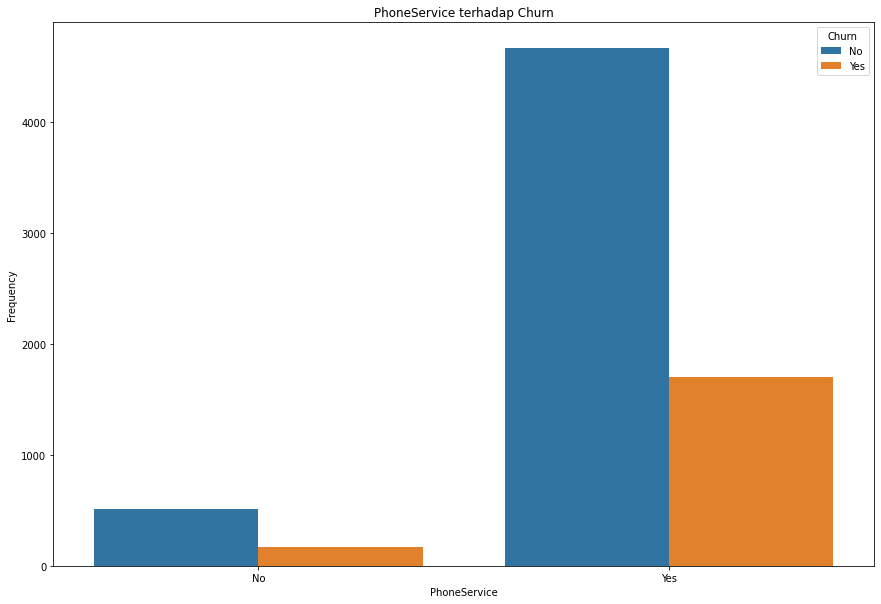

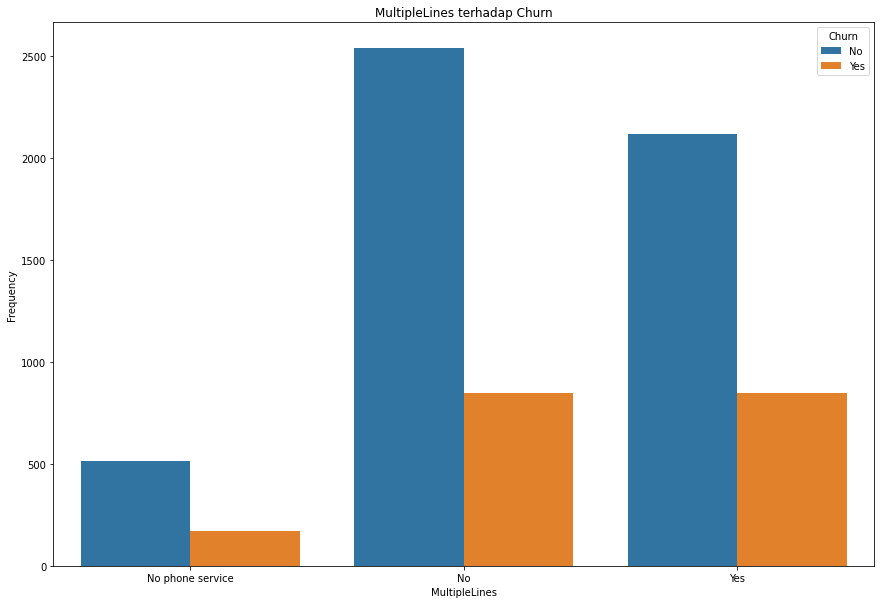

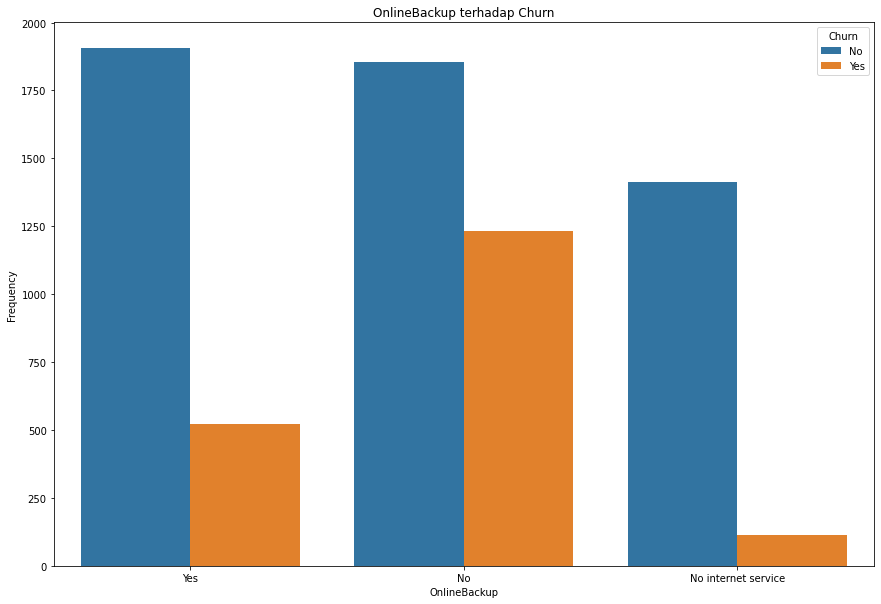

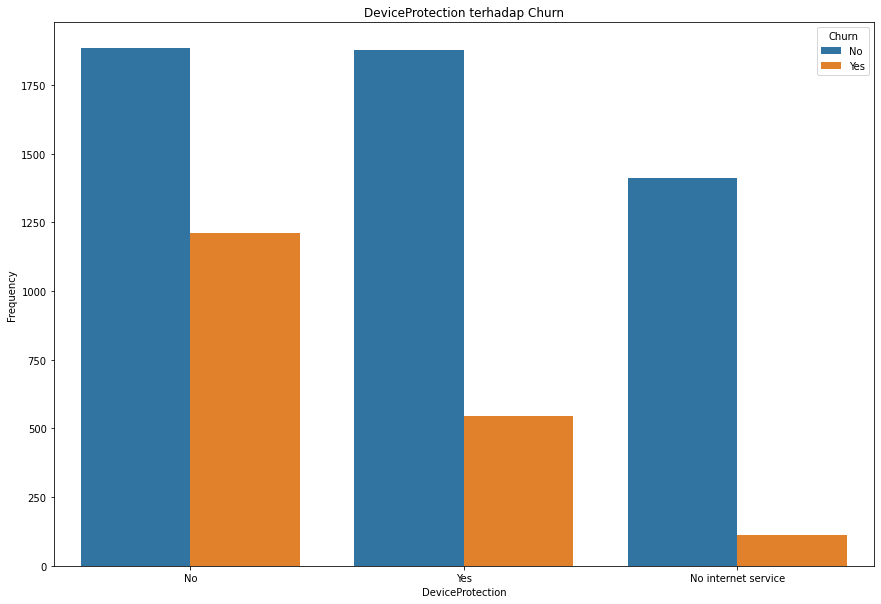

In [27]:
#membuat count plot
plt.figure(figsize=(50,10))
plt.subplot(1, 3, 1)
sns.countplot(x='PhoneService', data=data,hue='Churn')
plt.title('PhoneService terhadap Churn')
plt.xlabel('PhoneService')
plt.ylabel('Frequency')
#membuat count plot
plt.figure(figsize=(50,10))
plt.subplot(1, 3, 1)
sns.countplot(x='MultipleLines', data=data,hue='Churn')
plt.title('MultipleLines terhadap Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Frequency')
#membuat count plot
plt.figure(figsize=(50,10))
plt.subplot(1, 3, 1)
sns.countplot(x='OnlineBackup', data=data,hue='Churn')
plt.title('OnlineBackup terhadap Churn')
plt.xlabel('OnlineBackup')
plt.ylabel('Frequency')
#membuat count plot
plt.figure(figsize=(50,10))
plt.subplot(1, 3, 1)
sns.countplot(x='DeviceProtection', data=data,hue='Churn')
plt.title('DeviceProtection terhadap Churn')
plt.xlabel('DeviceProtection')
plt.ylabel('Frequency')

Dari 4 feature yang telah di cek, terlihat kecil korelasi, karena semua aspek kategori ada churn adapun tidak, dan tidak terlihat jelas korelasi, karena ada kemungkinan data imbalance artinnya susah membandingkan ada efek pengaruh atau tidak, tetapi disini peneliti menyimpulkan disetiap kategori ada churn dan tidak churn 

<H1>InternetService ,OnlineSecurity,TechSupport,StreamingTV</h1>

<li>InternetService:Penyedia layanan internet pelanggan (DSL, Fiber optic, No)
<li>OnlineSecurity:Apakah pelanggan memiliki keamanan online atau tidak (Ya, Tidak, Tidak ada layanan internet)
<li>TechSupport:Apakah pelanggan memiliki dukungan teknis atau tidak (Ya, Tidak, Tidak ada layanan internet)
<li>StreamingTV:Apakah pelanggan memiliki streaming film atau tidak (Ya, Tidak, Tidak ada layanan internet)

In [28]:
#cek Feature
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [29]:
#cek Feature
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [30]:
#cek Feature
data['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [31]:
#cek Feature
data['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [32]:
no=data.groupby(['InternetService','OnlineSecurity','TechSupport'])['Churn'].count().reset_index()
px.scatter(no,x='InternetService',y='Churn',color='Churn',size='Churn',hover_data=['InternetService','OnlineSecurity','TechSupport'])

terlihat ada pergerakan setiap kategori terhadap churn, menandakan ada korelasi di 4 feature diatas

<h1><b>StreamingMovies,Contract,PaperlessBilling,PaymentMethod</h1></b>

<li>StreamingMovies:Apakah pelanggan memiliki streaming film atau tidak (Ya, Tidak, Tidak ada layanan internet)
<li>Contract:Jangka waktu kontrak pelanggan (Bulan-ke-bulan, Satu tahun, Dua tahun)
<li>PaperlessBilling:Apakah pelanggan memiliki tagihan tanpa kertas atau tidak (Ya, Tidak)
<li>PaymentMethod:Metode pembayaran pelanggan (Cek elektronik, Cek pos, Transfer bank (otomatis), Kartu kredit (otomatis))

In [33]:
#cek Feature
data['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [34]:
#cek Feature
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [35]:
#cek Feature
data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
#cek Feature
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

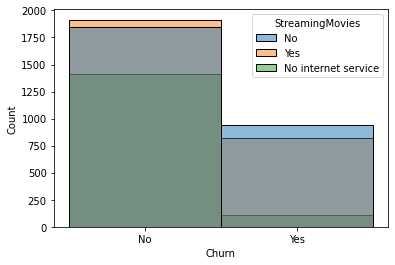

In [37]:
sns.histplot(data=data, x="Churn", hue="StreamingMovies")


Banyak di costumer churn dengan tidak adannya streaming movie,dan di costumer yang mempunyai streaming movie tidak churn, artinnya ada korelasi di feature ini terhadap churn.

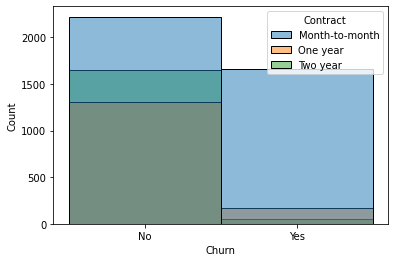

In [38]:
sns.histplot(data=data, x="Churn", hue="Contract")


terlihat data tidak imbalance di contract perbulan, banyak pelanggan churn jika kontrak perbulan dan contrack two year.disini juga peneliti melihat ada korelasi dengan churn

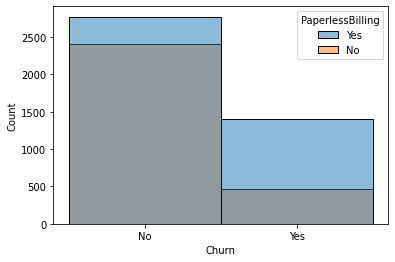

In [39]:
sns.histplot(data=data, x="Churn", hue="PaperlessBilling")


terlihat disini , hampir semua sudah papperles billing, artinya tidak ada korelasi churn di feature ini,jadi tidak berefek akan terjadinnya churn kepada pelanggan

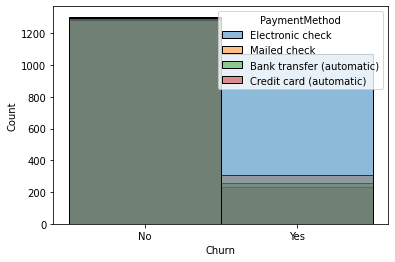

In [40]:
sns.histplot(data=data, x="Churn", hue="PaymentMethod")

terlihat banyak sekali pelanggan churn dengan pembayaran electronic check, ada hubungan korelasi tinggi di feature ini terhadap penyebab costumer churn.

<b><h1>MonthlyCharges</h1></b>

Jumlah yang dibebankan kepada pelanggan setiap bulan

Text(0, 0.5, 'MonthlyCharges')

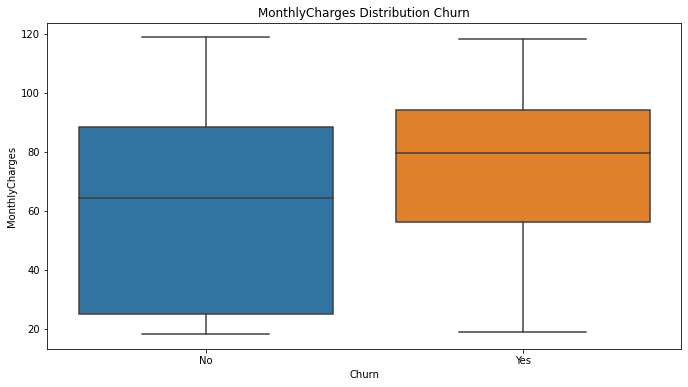

In [41]:
#Membuat Boxplot
plt.figure(figsize=(25,6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('MonthlyCharges Distribution Churn')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')

MonthlyCharges ada pergerakan makin tinggi monthly charge maka makin tinggi juga terjadinnya churn terhadap pelanggan.

<b><h1>TotalCharges<h1></b>

In [42]:
data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric, errors='coerce')

Jumlah total yang dibebankan kepada pelanggan

Text(0, 0.5, 'TotalCharges')

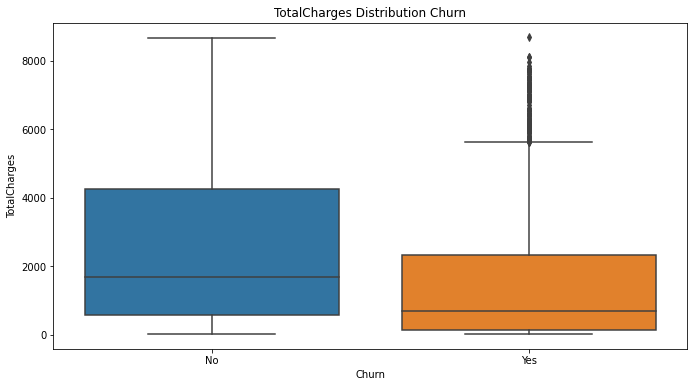

In [43]:
#Membuat Boxplot
plt.figure(figsize=(25,6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='TotalCharges', data=data)
plt.title('TotalCharges Distribution Churn')
plt.xlabel('Churn')
plt.ylabel('TotalCharges')

TotalCharges menarik, banyaknya total charge dibayarkan dari pelanggan, makin tinggi total charge makin rendah juga terjadinnya churn terhadap costumer.

In [44]:
#membuat korelasi dengan C-map
cat_corr = pd.get_dummies(data[['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','gender','TotalCharges']]).corr()
cat_corr.style.background_gradient(cmap='coolwarm')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,-0.150889,0.150889,-0.016479,0.016479,0.211185,-0.211185,-0.008576,0.008576,-0.136213,-0.008576,0.142948,-0.108322,0.255338,-0.182742,0.185532,-0.182742,-0.038653,0.087952,-0.182742,0.066572,0.094810,-0.182742,0.059428,0.205620,-0.182742,-0.060625,0.049062,-0.182742,0.105378,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477,0.001874,-0.001874
tenure,0.016567,1.000000,0.247900,0.825880,0.352229,-0.352229,-0.379697,0.379697,-0.159712,0.159712,-0.008448,0.008448,-0.323088,-0.008448,0.331941,0.013274,0.019720,-0.039062,-0.263746,-0.039062,0.327203,-0.312694,-0.039062,0.360277,-0.312740,-0.039062,0.360653,-0.262143,-0.039062,0.324221,-0.245039,-0.039062,0.279756,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852,-0.005106,0.005106
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,-0.193356,0.193356,-0.096848,0.096848,0.113890,-0.113890,-0.247398,0.247398,-0.338314,-0.247398,0.490434,-0.160189,0.787066,-0.763557,0.360898,-0.763557,0.296594,0.210753,-0.763557,0.441780,0.171836,-0.763557,0.482692,0.322076,-0.763557,0.338304,0.016951,-0.763557,0.629603,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437,0.014569,-0.014569
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.199484,-0.199484,-0.319072,0.319072,-0.064653,0.064653,-0.113008,0.113008,-0.396765,-0.113008,0.469042,-0.052190,0.360769,-0.374878,-0.064515,-0.374878,0.412619,-0.177633,-0.374878,0.510100,-0.189485,-0.374878,0.522881,-0.084270,-0.374878,0.432868,-0.197144,-0.374878,0.515709,-0.202605,-0.374878,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708,-0.000048,0.000048
Churn_No,-0.150889,0.352229,-0.193356,0.199484,1.000000,-1.000000,-0.150448,0.150448,-0.164221,0.164221,0.011942,-0.011942,0.032569,0.011942,-0.040102,0.124214,-0.308020,0.227890,-0.342637,0.227890,0.171226,-0.268005,0.227890,0.082255,-0.252481,0.227890,0.066160,-0.337281,0.227890,0.164674,-0.128916,0.227890,-0.063228,-0.130845,0.227890,-0.061382,-0.405103,0.177820,0.302253,0.191825,-0.191825,0.117937,0.134302,-0.301919,0.091683,-0.008612,0.008612
Churn_Yes,0.150889,-0.352229,0.193356,-0.199484,-1.000000,1.000000,0.150448,-0.150448,0.164221,-0.164221,-0.011942,0.011942,-0.032569,-0.011942,0.040102,-0.124214,0.308020,-0.227890,0.342637,-0.227890,-0.171226,0.268005,-0.227890,-0.082255,0.252481,-0.227890,-0.066160,0.337281,-0.227890,-0.164674,0.128916,-0.227890,0.063228,0.130845,-0.227890,0.061382,0.405103,-0.177820,-0.302253,-0.191825,0.191825,-0.117937,-0.134302,0.301919,-0.091683,0.008612,-0.008612
Partner_No,-0.016479,-0.379697,-0.096848,-0.319072,-0.150448,0.150448,1.000000,-1.000000,0.452676,-0.452676,0.017706,-0.017706,0.129929,0.017706,-0.142057,0.000851,-0.000304,-0.000615,0.129936,-0.000615,-0.143106,0.136058,-0.000615,-0.141498,0.147692,-0.000615,-0.153786,0.109443,-0.000615,

# 5 - Data Preprocessing

## Get Data for Model Inference

In [45]:
# Get Data for Model Inference

data_inf = data.sample(20, random_state=3)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
808,4289-DTDKW,Male,0,Yes,No,40,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.30,4113.10,Yes
1496,3195-TQDZX,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.25,61.45,No
4326,1455-ESIQH,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.10,89.10,Yes
492,0388-EOPEX,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes
2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No
4445,3134-DSHVC,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,No,Credit card (automatic),98.00,6218.45,No
1934,4587-NUKOX,Female,0,No,No,3,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.10,246.50,Yes
1166,7129-ACFOG,Female,0,No,No,5,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,53.80,283.95,No
1278,4730-AWNAU,Male,0,Yes,Yes,36,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),60.70,2234.55,No
591,5512-IDZEI,Male,0,Yes,Yes,46,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1174.80,No


In [46]:
# Remove Inference Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [47]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4289-DTDKW,Male,0,Yes,No,40,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.30,4113.10,Yes
1,3195-TQDZX,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.25,61.45,No
2,1455-ESIQH,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.10,89.10,Yes
3,0388-EOPEX,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes
4,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No
5,3134-DSHVC,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,No,Credit card (automatic),98.00,6218.45,No
6,4587-NUKOX,Female,0,No,No,3,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.10,246.50,Yes
7,7129-ACFOG,Female,0,No,No,5,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,53.80,283.95,No
8,4730-AWNAU,Male,0,Yes,Yes,36,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),60.70,2234.55,No
9,5512-IDZEI,Male,0,Yes,Yes,46,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1174.80,No


## Splitting between `X` and `y`

In [48]:
# Splitting between X and y

X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']

In [49]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=3)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (5073, 20)
Val Size :  (896, 20)
Test Size :  (1054, 20)


## Handling OUTLIER

In [50]:
# Plot outlier for target

def outlier_plot(features):
    # Define figure size
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(features, bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=features)
    plt.title('Boxplot')

    plt.show()

In [51]:
# make function to see histogram distribusion data dan box plot outliers
def diagnostic_plots(df_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_train[variable])
    plt.title('Boxplot')

    plt.show()
    
    print('skewness:', df_train[variable].skew())
    if (df_train[variable].skew() >= 0.5 ):
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

In [52]:
# make boundary function
def iqr_calc(feature):
    skew_value = feature.skew()
    if -0.5 > skew_value < 0.5:
        upper_boundary = feature.mean() + 3 * feature.std()
        lower_boundary = feature.mean() - 3 * feature.std()
    else:
        IQR= feature.quantile(0.75) - feature.quantile(0.25)
        lower_boundary= feature.quantile(0.25)-(IQR*1.5)
        upper_boundary= feature.quantile(0.75)+(IQR*1.5)
    return lower_boundary, upper_boundary

In [53]:
# make capping function
def capping_data(dataset, column):
  lower_bound, upper_bound = iqr_calc(dataset[column])
  dataset.loc[dataset[column] > upper_bound, column] = upper_bound
  dataset.loc[dataset[column] < lower_bound, column] = lower_bound
  return dataset

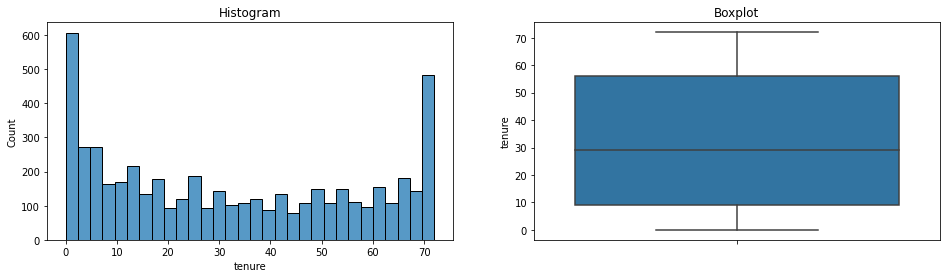

skewness: 0.23013622108244078
the distribution is normal


In [54]:
# diagram open
diagnostic_plots(X_train, 'tenure')

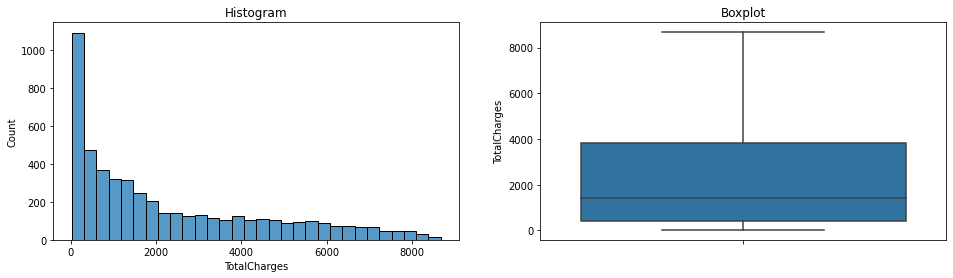

skewness: 0.9534706018030398
the distribution is skewed


In [55]:
# diagram open
diagnostic_plots(X_train, 'TotalCharges')

Telah dilakukan cek column tenure `normal` dan column TotalCharges  `skew` , semua tidak ada <b>outlier</b>

## Handling Missing Values

In [56]:
# Check Missing Values on X_train

X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
dtype: int64

In [57]:
# Check Missing Values on X_val

X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [58]:
# Check Missing Values on X_test

X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

In [59]:
#drop missing value
X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [60]:
#cek missing value
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
dtype: int64

In [61]:
#cek missing value
X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

In [62]:
median_Xtrain = X_train['TotalCharges'].median()
X_train['TotalCharges'].fillna(median_Xtrain, inplace=True)


In [63]:
median_Xtes = X_test['TotalCharges'].median()
X_test['TotalCharges'].fillna(median_Xtes, inplace=True)

In [64]:
median_Xval = X_val['TotalCharges'].median()
X_val['TotalCharges'].fillna(median_Xval, inplace=True)

<p>Missing value sudah di handle, dan rubah ke median, karena hanya 11 data, peneliti memutuskan tidak drop tetapi mengganti dengan nilai median</p>

## Feature Selection

In [65]:
# Display X_train

X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3647,1142-IHLOO,Female,0,No,No,51,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,One year,No,Credit card (automatic),87.55,4475.90
3619,3878-AVSOQ,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71.25,71.25
2168,2878-RMWXY,Male,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),102.65,7550.30
1300,0201-OAMXR,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.55,8127.60
155,6551-GNYDG,Female,0,Yes,Yes,14,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),80.90,1152.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,2061-VVFST,Female,0,Yes,No,37,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.50,805.20
4877,4432-ADRLB,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.65,74.90
6101,0080-EMYVY,Female,0,No,No,14,Yes,No,DSL,No,Yes,No,No,No,No,One year,No,Credit card (automatic),51.45,727.85
3103,9391-DXGGG,Female,1,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,One year,No,Credit card (automatic),89.15,3990.75


In [66]:
# membuat df bedasarkan Feature selection

X_train=X_train[['tenure','InternetService','OnlineSecurity','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','TotalCharges']]
X_test=X_test[['tenure','InternetService','OnlineSecurity','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','TotalCharges']]
X_val=X_val[['tenure','InternetService','OnlineSecurity','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','TotalCharges']]
X_train

,tenure,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,TotalCharges
3647,51,Fiber optic,No,No,Yes,Yes,One year,Credit card (automatic),4475.90
3619,1,Fiber optic,No,No,No,No,Month-to-month,Electronic check,71.25
2168,72,Fiber optic,Yes,No,No,Yes,Two year,Credit card (automatic),7550.30
1300,70,Fiber optic,Yes,Yes,Yes,Yes,One year,Credit card (automatic),8127.60
155,14,Fiber optic,No,No,No,Yes,Month-to-month,Bank transfer (automatic),1152.80
...,...,...,...,...,...,...,...,...,...
6706,37,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,Bank transfer (automatic),805.20
4877,2,DSL,No,No,No,No,Month-to-month,Mailed check,74.90
6101,14,DSL,No,No,No,No,One year,Credit card (automatic),727.85
3103,44,Fiber optic,No,No,No,Yes,One year,Credit card (automatic),3990.75


Feature selection bedasarkan dari EDA
<li>tenure',
<li>'InternetService',
<li>'OnlineSecurity',
<li>'TechSupport',
<li>'StreamingTV',
<li>'StreamingMovies',
<li>'Contract',
<li>'PaymentMethod',
<li>'TotalCharges'

## Get Numerical Columns and Categorical Columns

In [67]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['tenure', 'TotalCharges']
Categorical Columns :  ['InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


## Pipeline

In [68]:
#divide num by skew and normal, cat by ordinal and none
num_normal = ['tenure']
num_skew = ['TotalCharges']
cat_ord = ['InternetService','OnlineSecurity','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']


In [69]:
#persiapkan column transformer untuk membedakan proses per kolom
preprocess = ColumnTransformer([
    ('numnormal', StandardScaler(),num_normal),
    ('numskew', MinMaxScaler(),num_skew),
    ('catord', OrdinalEncoder(),cat_ord)
  ])

In [70]:
# Fit and Transform

X_train_pipline = preprocess.fit_transform(X_train)
X_val_pipline = preprocess.transform(X_val)
X_test_pipline = preprocess.transform(X_test)
X_train_pipline.shape

(5073, 9)

##  Encoding Y target

dikarenakan bentuk dari target kita categorical maka perlu dilakuakan encoding menggunakan Label Encoder

In [71]:
#Encoding target
labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(y_train)

LabelEncoder()

In [72]:
#classes dari label encoder
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [73]:
#transform y target
y_train_encoded = labelencoder.transform(y_train)
y_test_encoded = labelencoder.transform(y_test)
y_val_encoded = labelencoder.transform(y_val)

In [74]:
# to dataframe
y_train_enc = pd.DataFrame(y_train_encoded, columns=['Churn'])
y_test_enc = pd.DataFrame(y_test_encoded, columns=['Churn'])
y_val_enc = pd.DataFrame(y_val_encoded, columns=['Churn'])

In [75]:
y_val_enc

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
891,0
892,0
893,1
894,0


<li>1 adalah costumer `churn`
<li>0 adalah costumer tidak `churn`

## Tensor Pipline

In [76]:
#train
train_dataset=tf.data.Dataset.from_tensor_slices((X_train_pipline,y_train_enc))
#Shuffle and slice train dataset
train_dataset=train_dataset.shuffle(buffer_size=100).batch(64)

In [77]:
#val
val_dataset=tf.data.Dataset.from_tensor_slices((X_val_pipline,y_val_enc))
#Shuffle and slice train dataset
val_dataset=val_dataset.batch(64)

In [78]:
#tes
tes_dataset=tf.data.Dataset.from_tensor_slices((X_test_pipline,y_test_enc))
#Shuffle and slice train dataset
tes_dataset=tes_dataset.batch(64)

# 6 - Sequential API

## 6.1 - Model Definition

In [79]:
# Create Sequential API
model_sequential = Sequential()
model_sequential.add(Dense(10, activation='relu', input_shape=(9,))) #Hidden
model_sequential.add(Dense(1, activation='sigmoid'))  # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


Peneliti disini menggunakan `10 neuron dan 9 feature`, dengan `output layer 1 neuron`, dengan ditambahkan aktivasi relu dimana untuk menyalakan neuron ,untuk aktifasi peneliti memilih `sigmoid(dikarenakan target hanya 2 class, iya atau tidak/1 atau 0)` aktivasi ini sering dipakai memang untuk clasifikasi, walaupun bisa juga memakai `softmax` dimana `softmax` adalah untuk `clasifikasi multiclass`, tetapi bisa juga dipakai walaupun hanya 2 class, disini peneliti untuk menerapkan `baseline model memakai sigmoid`. Untuk loss peneliti memakai `binary_crossentropy`, `Cross-entropy adalah fungsi loss default yang digunakan untuk masalah klasifikasi biner`, dan Ini dimaksudkan untuk digunakan dengan klasifikasi biner di mana nilai target berada di set 0 dan 1, untuk baseline peneliti mencoba memakai optimizer `Adam`, dan untuk metrics memakai `accuracy`, dikarenakan `peniliti membuat model untuk case classification`.

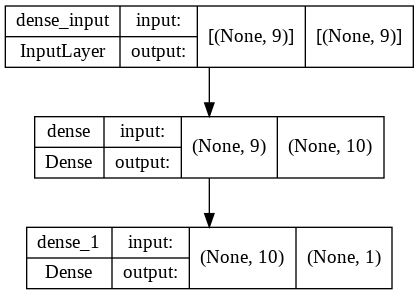

In [80]:
# Plot Layers

import tensorflow as tf

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

Terlihat kepada plot model Sequential baseline dimana `feature input dan output sama`,dan dibawahnya dengan input `feature dan output neuron` dimana neuron, peneliti memasukan 10, dan di bawahnnya `input neuron dan output 1`

## 6.2 - Model Training

In [81]:
## Train the Model

%%time
history_seq = model_sequential.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
80/80 [==============================] - 1s 4ms/step - loss: 0.5496 - accuracy: 0.7256 - val_loss: 0.5523 - val_accuracy: 0.7054
Epoch 2/10
80/80 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7378 - val_loss: 0.5276 - val_accuracy: 0.7065
Epoch 3/10
80/80 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7398 - val_loss: 0.5129 - val_accuracy: 0.7132
Epoch 4/10
80/80 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.7499 - val_loss: 0.5012 - val_accuracy: 0.7321
Epoch 5/10
80/80 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.7707 - val_loss: 0.4939 - val_accuracy: 0.7489
Epoch 6/10
80/80 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.7719 - val_loss: 0.4904 - val_accuracy: 0.7455
Epoch 7/10
80/80 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7709 - val_loss: 0.4878 - val_accuracy: 0.7612
Epoch 8/10
80/80 [==

untuk baseline model, peneliti melakukan epoch 10, dimana `epoch` adalah ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran

## 6.3 - Model Evaluation

In [82]:
# Create Dataframe

history_seq_df = pd.DataFrame(history_seq.history)

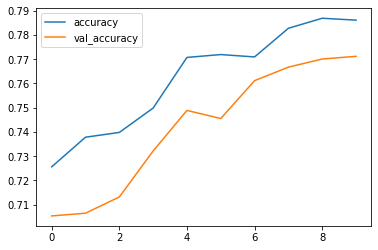

In [83]:
# Plot between Accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

Peneliti melihat, cukup baik dikarenakan, setiap penambahan epoch accurasi meningkat,dan harapannya accurasi val lebih tinggi dari train

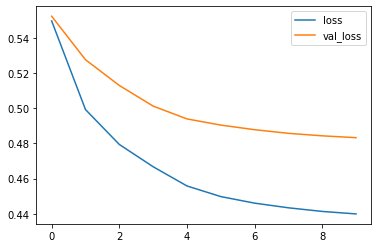

In [84]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

Peneliti melihat, kemampuan belajar sudah baik, karena loss turun dengan bertambahnnya EPOCH val dan train.

In [85]:
# Model Evaluation using Classification Report
from sklearn.metrics import classification_report

y_pred_seq = model_sequential.predict(X_test_pipline)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_seq))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       799
           1       0.56      0.42      0.48       255

    accuracy                           0.78      1054
   macro avg       0.69      0.66      0.67      1054
weighted avg       0.76      0.78      0.77      1054



Untuk target 0

---
<b>Precision</b>:`84% dari 799(hasil support) ,memperediksi orang yang ada dikelas 0 dengan benar`. dan `16 % salah prediksi tentang 0` dan dimasukan ke kelas 1
,`16% kita prediksi 0 padahal bukan,dimana 0 adalah status tidak churn`<br>
<b>Recall</b>: `88% berhasil memprediksi orang yang ada di kelas 0 dengan benar`,` 12% salah prediksi, kita prediksi bukan sebagai 0, `padahal harusnya dia
masuk ke kelas 0, dimana 0 adalah pelanggan tidak churn


Untuk target 1


---

<b>Precision</b>:`57% dari 255(hasil support) ,memperediksi orang yang ada dikelas 1 dengan benar`. dan `43 % salah prediksi tentang 1 dan dimasukan ke kelas 0`. ,`43% kita prediksi 1 padahal bukan`,dimana 1 adalah status churn<br>
<b>Recall</b>: `49% berhasil memprediksi orang yang ada di kelas 1 dengan benar`, `51% salah prediksi, kita prediksi bukan sebagai 1`, padahal harusnya dia masuk ke kelas 1 dimana 1 adalah pelanggan  churn

`Untuk Accurasi di 79%`

###6.3.1-sequential Model Improvement

#Model definition Improvement

In [86]:
#improvement

model_sequential1 = Sequential()
model_sequential1.add(Dense(32,input_shape=(9,),kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))#hidden1
model_sequential1.add(tf.keras.layers.Dense(64))#hidden2
model_sequential1.add(tf.keras.layers.BatchNormalization())#hidden3
model_sequential1.add(tf.keras.layers.Activation('relu'))#hidden3

model_sequential1.add(tf.keras.layers.Dense(128))#hidden4
model_sequential1.add(tf.keras.layers.BatchNormalization())#hidden4
model_sequential1.add(tf.keras.layers.Activation('relu'))#hidden4

model_sequential1.add(tf.keras.layers.Dense(256))#hidden5
model_sequential1.add(tf.keras.layers.BatchNormalization())#hidden5
model_sequential1.add(tf.keras.layers.Activation('relu'))#hidden5

model_sequential1.add(tf.keras.layers.Dense(512))#hidden6
model_sequential1.add(tf.keras.layers.BatchNormalization())#hidden6
model_sequential1.add(tf.keras.layers.Activation('relu'))#hidden6

model_sequential1.add(tf.keras.layers.Dense(1, activation='sigmoid'))#output

# Compile
model_sequential1.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

model_sequential1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                320       
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                      

Peneliti melakukan Improvement, dengan menambahkan hiden layer, dan neuron dikali 2 dari neuron hidden 1,dan menambahkan nitializers glorot dengan seed 40, diharapkan menambah performa

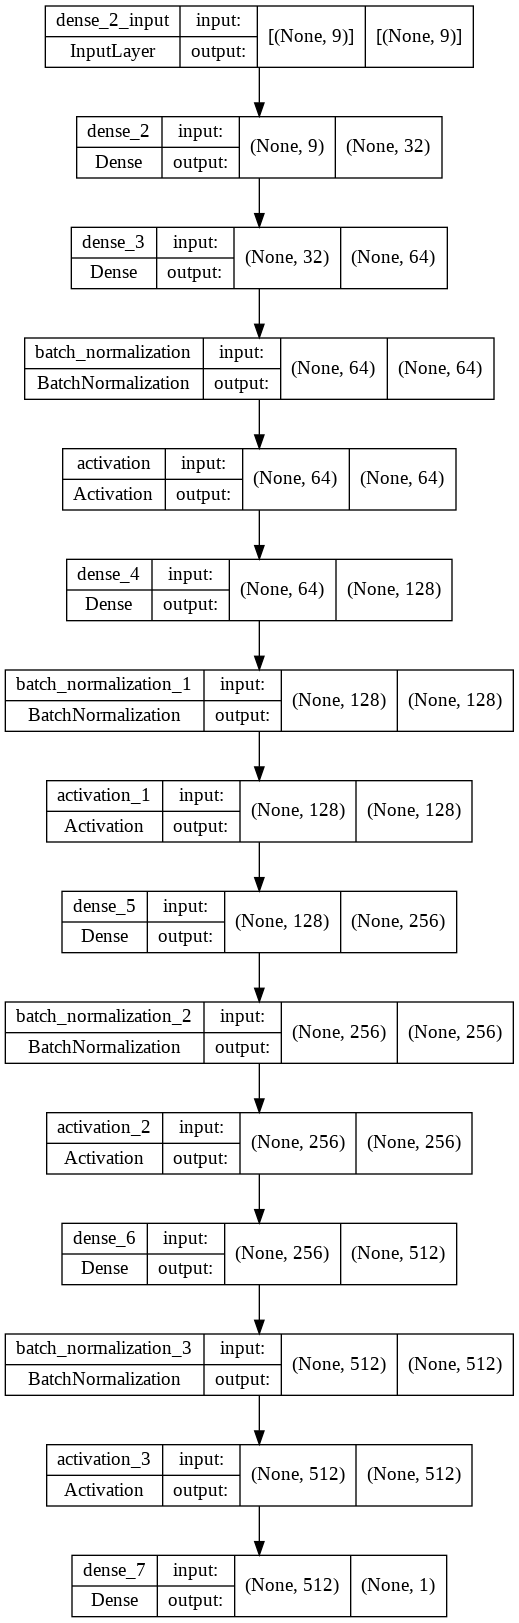

In [87]:
tf.keras.utils.plot_model(model_sequential1, show_shapes=True)

Terlihat plot model perjalan pembeljaran model yang sudah peneliti improvment.

In [88]:
## Train the Model

%%time
history_seq1 = model_sequential1.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
80/80 [==============================] - 2s 11ms/step - loss: 0.4883 - accuracy: 0.7633 - val_loss: 0.5277 - val_accuracy: 0.7065
Epoch 2/20
80/80 [==============================] - 1s 8ms/step - loss: 0.4416 - accuracy: 0.7838 - val_loss: 0.4840 - val_accuracy: 0.7690
Epoch 3/20
80/80 [==============================] - 1s 9ms/step - loss: 0.4245 - accuracy: 0.7970 - val_loss: 0.4599 - val_accuracy: 0.7779
Epoch 4/20
80/80 [==============================] - 1s 8ms/step - loss: 0.4169 - accuracy: 0.7987 - val_loss: 0.4644 - val_accuracy: 0.7801
Epoch 5/20
80/80 [==============================] - 1s 8ms/step - loss: 0.4143 - accuracy: 0.8015 - val_loss: 0.4652 - val_accuracy: 0.7757
Epoch 6/20
80/80 [==============================] - 1s 8ms/step - loss: 0.4120 - accuracy: 0.8001 - val_loss: 0.4701 - val_accuracy: 0.7779
Epoch 7/20
80/80 [==============================] - 1s 8ms/step - loss: 0.4060 - accuracy: 0.8043 - val_loss: 0.4748 - val_accuracy: 0.7746
Epoch 8/20
80/80 [=

In [89]:
#buat dataframe
history_seq_df1 = pd.DataFrame(history_seq.history)

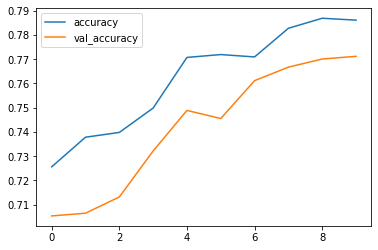

In [90]:
# Plot between Accuracy and val_accuracy

history_seq_df1[['accuracy', 'val_accuracy']].plot()

Accuracy sama seperti model baseline, dan bagus dikarenakan accuracy meningkat dengan berjalannya epoch

In [91]:
#predik accuracy
y_pred_seq = model_sequential.predict(X_test_pipline)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_seq))
print('setelah improvement')
print('=======================================================')
y_pred_seq1 = model_sequential1.predict(X_test_pipline)
y_pred_seq1 = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_seq1))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       799
           1       0.56      0.42      0.48       255

    accuracy                           0.78      1054
   macro avg       0.69      0.66      0.67      1054
weighted avg       0.76      0.78      0.77      1054

setelah improvement
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       799
           1       0.56      0.42      0.48       255

    accuracy                           0.78      1054
   macro avg       0.69      0.66      0.67      1054
weighted avg       0.76      0.78      0.77      1054



setelah peniliti coba dan coba, accuracy tetap sama dan tidak ada perubahan.

# 7 - Functional API

## 7.1 - Model Definition

In [92]:
# Create Functional Model

input_layer = Input(shape=(9,))
hidden_layer = Dense(4, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Model Compile
model_functional.compile(loss='binary_crossentropy', 
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_8 (Dense)             (None, 4)                 40        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


Untuk baseline functional peneliti mendefinisikan neuron 4,dengan optimizer adam dan metriks accuracy, dengan activation sigmoid dimana fungsi itu untuk clasifikasi dengan target 0 atau 1

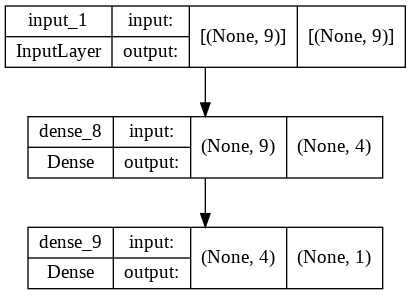

In [93]:
# Plot Models

tf.keras.utils.plot_model(model_functional, show_shapes=True)

## 7.2 - Model Training

In [94]:
## Train the Model

%%time
history_functional = model_functional.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
80/80 [==============================] - 1s 3ms/step - loss: 1.2440 - accuracy: 0.2888 - val_loss: 0.9257 - val_accuracy: 0.3225
Epoch 2/10
80/80 [==============================] - 0s 2ms/step - loss: 0.8120 - accuracy: 0.4258 - val_loss: 0.7051 - val_accuracy: 0.5458
Epoch 3/10
80/80 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6205 - val_loss: 0.6327 - val_accuracy: 0.6562
Epoch 4/10
80/80 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.7031 - val_loss: 0.6054 - val_accuracy: 0.6875
Epoch 5/10
80/80 [==============================] - 0s 2ms/step - loss: 0.5712 - accuracy: 0.7187 - val_loss: 0.5857 - val_accuracy: 0.6953
Epoch 6/10
80/80 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.7246 - val_loss: 0.5677 - val_accuracy: 0.6998
Epoch 7/10
80/80 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7258 - val_loss: 0.5513 - val_accuracy: 0.6975
Epoch 8/10
80/80 [==

Train model functional baseline dengan epoch 10

## 7.3 - Model Evaluation

In [95]:
# Create Dataframe

history_functional = pd.DataFrame(history_functional.history)

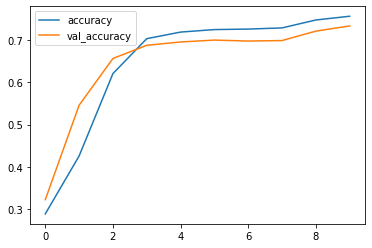

In [96]:
# Plot between Accuracy and val_accuracy

history_functional[['accuracy', 'val_accuracy']].plot()

Accuracy meningkat dengan berjlannya epoch, yang berarti model berhasil belajar

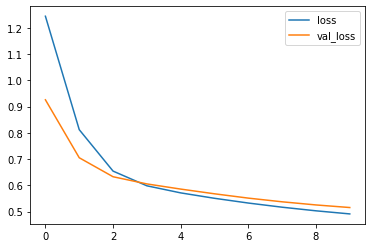

In [97]:
# Plot between loss and val_loss

history_functional[['loss', 'val_loss']].plot()

Loss turun berjalannya epoch yang artinnya model belajar.

In [98]:
# Model Evaluation using Classification Report
from sklearn.metrics import classification_report

y_pred_func = model_functional.predict(X_test_pipline)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_func))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       799
           1       0.51      0.29      0.37       255

    accuracy                           0.76      1054
   macro avg       0.66      0.60      0.61      1054
weighted avg       0.73      0.76      0.74      1054




Untuk target 0

---
<b>Precision</b>:`85% dari 799(hasil support) ,memperediksi orang yang ada dikelas 0 dengan benar`. dan `15 % salah prediksi tentang 0` dan dimasukan ke kelas 1
,`15% kita prediksi 0 padahal bukan,dimana 0 adalah status tidak churn`<br>
<b>Recall</b>: `86% berhasil memprediksi orang yang ada di kelas 0 dengan benar`,` 14% salah prediksi, kita prediksi bukan sebagai 0, `padahal harusnya dia
masuk ke kelas 0, dimana 0 adalah pelanggan tidak churn

Untuk target 1


---

<b>Precision</b>:`54% dari 255(hasil support) ,memperediksi orang yang ada dikelas 1 dengan benar`. dan `46 % salah prediksi tentang 1 dan dimasukan ke kelas 0`. ,`46% kita prediksi 1 padahal bukan`,dimana 1 adalah status churn<br>
<b>Recall</b>: `51% berhasil memprediksi orang yang ada di kelas 1 dengan benar`, `51% salah prediksi, kita prediksi bukan sebagai 1`, padahal harusnya dia masuk ke kelas 1 dimana 1 adalah pelanggan  churn

`Accuracy ada di nilai 78%`

### 7.3.1-Functional Model Improvement

In [99]:
# Create Functional Model
input_layer = Input(shape=(16,))
initializer = Dense(64, kernel_initializer= tf.keras.initializers.GlorotNormal(seed=64))(input_layer)
hidden_layer = Dense(32, activation='relu')(initializer)
hidden_layer2 = Dense(16, activation='relu')(hidden_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

model2 = Model(inputs=input_layer, outputs=output_layer)

In [100]:
# Create Functional Model

input_layer = Input(shape=(9,))
initializer = Dense(64, kernel_initializer= tf.keras.initializers.GlorotNormal(seed=64))(input_layer)
hidden_layer = Dense(44, activation='relu')(initializer)#hidden1
hidden_layer1 = Dense(24, activation='relu')(hidden_layer)#hidden2
hidden_layer2 = Dense(14, activation='relu')(hidden_layer1)#hidden3
hidden_layer3= Dense(6, activation='relu')(hidden_layer2)#hidden3
output_layer = Dense(1, activation='sigmoid')(hidden_layer3)#hidden3

model_functional1 = Model(inputs=input_layer, outputs=output_layer)

# Model Compile
model_functional1.compile(loss='binary_crossentropy', 
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_14 (Dense)            (None, 64)                640       
                                                                 
 dense_15 (Dense)            (None, 44)                2860      
                                                                 
 dense_16 (Dense)            (None, 24)                1080      
                                                                 
 dense_17 (Dense)            (None, 14)                350       
                                                                 
 dense_18 (Dense)            (None, 6)                 90        
                                                                 
 dense_19 (Dense)            (None, 1)                 7   

Untuk Improvement peneliti menambahkan hidden lier dan neuron, peneliti juga memasukan kernel initializers Glorot

In [101]:
## Train the Model

%%time
history_functional1 = model_functional1.fit(train_dataset, epochs=50, validation_data=val_dataset)

Epoch 1/50
80/80 [==============================] - 1s 4ms/step - loss: 0.5024 - accuracy: 0.7445 - val_loss: 0.4800 - val_accuracy: 0.7656
Epoch 2/50
80/80 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.7932 - val_loss: 0.4699 - val_accuracy: 0.7623
Epoch 3/50
80/80 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.7956 - val_loss: 0.4628 - val_accuracy: 0.7656
Epoch 4/50
80/80 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.7979 - val_loss: 0.4598 - val_accuracy: 0.7645
Epoch 5/50
80/80 [==============================] - 0s 3ms/step - loss: 0.4170 - accuracy: 0.8017 - val_loss: 0.4601 - val_accuracy: 0.7723
Epoch 6/50
80/80 [==============================] - 0s 3ms/step - loss: 0.4142 - accuracy: 0.8013 - val_loss: 0.4580 - val_accuracy: 0.7746
Epoch 7/50
80/80 [==============================] - 0s 3ms/step - loss: 0.4120 - accuracy: 0.8033 - val_loss: 0.4574 - val_accuracy: 0.7701
Epoch 8/50
80/80 [==

In [102]:
history_fun_df1 = pd.DataFrame(history_functional1.history)

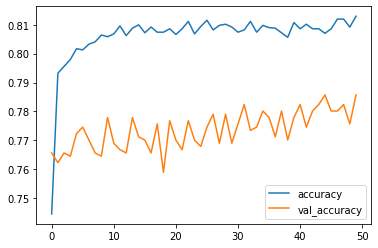

In [103]:
# Plot between Accuracy and val_accuracy

history_fun_df1[['accuracy', 'val_accuracy']].plot()

accuracy ada kenaikan tetapi terlihat exploding ditengah

In [104]:
# Model Evaluation using Classification Report
y_pred_func = model_functional.predict(X_test_pipline)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_func))

print('--------------------setelah improve----------------------')
print('--------------------:3----------------------')
y_pred_func = model_functional1.predict(X_test_pipline)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_func))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       799
           1       0.51      0.29      0.37       255

    accuracy                           0.76      1054
   macro avg       0.66      0.60      0.61      1054
weighted avg       0.73      0.76      0.74      1054

--------------------setelah improve----------------------
--------------------:3----------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       799
           1       0.60      0.52      0.56       255

    accuracy                           0.80      1054
   macro avg       0.73      0.71      0.72      1054
weighted avg       0.79      0.80      0.80      1054



terlihat pada model functional Ada kenaikan setelah di improve ada di `recall`, dan `accuracy menjadi 80%`

#8 - MODEL INFERENCE

In [105]:
#reset index data inference
data_inf = data_inf.reset_index(drop=True)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4289-DTDKW,Male,0,Yes,No,40,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.30,4113.10,Yes
1,3195-TQDZX,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.25,61.45,No
2,1455-ESIQH,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.10,89.10,Yes
3,0388-EOPEX,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes
4,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No
5,3134-DSHVC,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,No,Credit card (automatic),98.00,6218.45,No
6,4587-NUKOX,Female,0,No,No,3,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.10,246.50,Yes
7,7129-ACFOG,Female,0,No,No,5,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,53.80,283.95,No
8,4730-AWNAU,Male,0,Yes,Yes,36,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),60.70,2234.55,No
9,5512-IDZEI,Male,0,Yes,Yes,46,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1174.80,No


##Inference Preprocessing

Tidak melakukan preprocessing karena data memakai pipline

##Infernce Prediction

In [106]:
#mendefinisikan nama data_inf menjadi inference
inference=data_inf

In [107]:
#membuat mendefiniskan inference_pipline terhadap data inference sudah di panggil fungsi pipline
inference_pipline= preprocess.transform(inference)

In [108]:
#mendefinisikan variable yang berisi model
y_pred_inf_seq =model_sequential1.predict(inference_pipline)

In [109]:
#mendefinisikan variable yang berisi model
y_pred_inf_fun =model_functional1.predict(inference_pipline)

In [110]:
#memakai fungsi numpy agar target menjadi 0 dan 1
y_pred_inf_fun=np.where(y_pred_inf_fun >= 0.5, 1, 0)

In [111]:
#memakai fungsi numpy agar target menjadi 0 dan 1
y_pred_inf_seq=np.where(y_pred_inf_seq >= 0.5, 1, 0)

In [112]:
#kembalikan ke bentuk semula menjadi yes dan no
y_pred_inf_fun= labelencoder.inverse_transform(y_pred_inf_fun)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [113]:
#kembalikan ke bentuk semula menjadi yes dan no
y_pred_inf_seq= labelencoder.inverse_transform(y_pred_inf_seq)

In [114]:
#cek apakah sudah berubah
y_pred_inf_seq

array(['Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

In [115]:
#rubah ke data frame
y_pred_inf_seq = pd.DataFrame(y_pred_inf_seq, columns=['sequential'])
y_pred_inf_seq

,sequential
0,Yes
1,Yes
2,Yes
3,No
4,No
5,No
6,No
7,No
8,No
9,No


In [116]:
#rubah ke data frame
y_pred_inf_fun = pd.DataFrame(y_pred_inf_fun, columns=['functional'])
y_pred_inf_fun

,functional
0,Yes
1,No
2,Yes
3,No
4,No
5,No
6,No
7,No
8,No
9,No


In [117]:
#cek data inference original
inference['Churn']

0     Yes
1      No
2     Yes
3     Yes
4      No
5      No
6     Yes
7      No
8      No
9      No
10    Yes
11     No
12    Yes
13     No
14     No
15     No
16    Yes
17     No
18     No
19     No
Name: Churn, dtype: object

In [118]:
#Buat dataframe prediction
predictions = pd.concat([inference['Churn'], y_pred_inf_seq,y_pred_inf_fun], axis=1)
predictions.columns = ['Actual','sequential','Functional']
predictions

,Actual,sequential,Functional
0,Yes,Yes,Yes
1,No,Yes,No
2,Yes,Yes,Yes
3,Yes,No,No
4,No,No,No
5,No,No,No
6,Yes,No,No
7,No,No,No
8,No,No,No
9,No,No,No


<li>sequential salah 6 dari 20 data
<li>functional salah 4 dari 20 data

Terlihat dari prediksi menggunakan data real, model functional lebih bagus, untuk deploy peneliti akan memakai model functional

#9 - KESIMPULAN

EDA:<br>
Pelanggan terdiri dari mayoritas adalah pelanggan tidak lanjut usia dan rata-rata langganan perbulan dengan nilai 70.350000, Data target terlihat imbalance, tetapi terlihat bagus dikarenakan lebih banyak yang tidak churn :), ada 73% costumer bertahan dan 26% costumer churn, Disini terlihat female banyak di churn dan tidak di churn, sepertinnya column ini sedikit corelasi dengan churn, di data ada 50% male dan 49% perempuan, Terlihat ada pergerakan dari boxplot jika lanjut usia maka makin kemungkinan akan churn, tidak ada perbedaan significan pasangan berpartner adalah alasan pelanggan akan churn atau tidak, tidak ada perbedaan significan dari pelanggan yang mempunyai tanggungan atau tidak dan menjadi alasan pelanggan akan churn atau tidak
Tenure terlihat dari BOX PLOT adanya pergerakan, yang dimana artinnya ada corelasi tinggi antara tenure dan churn, dimana makin lama tenure makin kecil potensi untuk menjadi churn,
Banyak di costumer churn dengan tidak adannya streaming movie,dan di costumer yang mempunyai streaming movie tidak churn, artinnya ada korelasi di feature ini terhadap churn.
terlihat data tidak imbalance di contract perbulan, banyak pelanggan churn jika kontrak perbulan dan contrack two year.disini juga peneliti melihat ada korelasi dengan churn
, hampir semua sudah papperles billing, artinya tidak ada korelasi churn di feature ini,jadi tidak berefek akan terjadinnya churn kepada pelanggan, banyak sekali pelanggan churn dengan pembayaran electronic check, ada hubungan korelasi tinggi di feature ini terhadap penyebab costumer churn, MonthlyCharges ada pergerakan makin tinggi monthly charge maka makin tinggi juga terjadinnya churn terhadap pelanggan, TotalCharges menarik, banyaknya total charge dibayarkan dari pelanggan, makin tinggi total charge makin rendah juga terjadinnya churn terhadap costumer.
<br>
<b>Preproses:</b>
Telah dilakukan cek column tenure normal dan column TotalCharges skew , semua tidak ada outlier,
Missing value sudah di handle, dan rubah ke median, karena hanya 11 data, peneliti memutuskan tidak drop tetapi mengganti dengan nilai median,Feature selection bedasarkan dari EDA.`tenure,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,TotalCharges`
<br>
<b>Model:</b>
Peneliti disini menggunakan `10 neuron dan 9 feature`, dengan `output layer 1 neuron`, dengan ditambahkan aktivasi relu dimana untuk menyalakan neuron ,untuk aktifasi peneliti memilih `sigmoid(dikarenakan target hanya 2 class, iya atau tidak/1 atau 0)` aktivasi ini sering dipakai memang untuk clasifikasi, walaupun bisa juga memakai `softmax` dimana `softmax` adalah untuk `clasifikasi multiclass`, tetapi bisa juga dipakai walaupun hanya 2 class, disini peneliti untuk menerapkan `baseline model memakai sigmoid`. Untuk loss peneliti memakai `binary_crossentropy`, `Cross-entropy adalah fungsi loss default yang digunakan untuk masalah klasifikasi biner`, dan Ini dimaksudkan untuk digunakan dengan klasifikasi biner di mana nilai target berada di set 0 dan 1, untuk baseline peneliti mencoba memakai optimizer `Adam`, dan untuk metrics memakai `accuracy`, dikarenakan `peniliti membuat model untuk case classification`.
Terlihat kepada plot model Sequential baseline dimana `feature input dan output sama`,dan dibawahnya dengan input `feature dan output neuron` dimana neuron, peneliti memasukan 10, dan di bawahnnya `input neuron dan output 1`
untuk baseline model, peneliti melakukan epoch 10, dimana `epoch` adalah ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran
Peneliti melihat, cukup baik dikarenakan, setiap penambahan epoch accurasi meningkat,dan harapannya accurasi val lebih tinggi dari train
Peneliti melihat, kemampuan belajar sudah baik, karena loss turun dengan bertambahnnya EPOCH val dan train.
<br>
<b>0 untuk sequential</b>
Untuk target 0

---
<b>Precision</b>:`84% dari 799(hasil support) ,memperediksi orang yang ada dikelas 0 dengan benar`. dan `16 % salah prediksi tentang 0` dan dimasukan ke kelas 1
,`16% kita prediksi 0 padahal bukan,dimana 0 adalah status tidak churn`<br>
<b>Recall</b>: `88% berhasil memprediksi orang yang ada di kelas 0 dengan benar`,` 12% salah prediksi, kita prediksi bukan sebagai 0, `padahal harusnya dia
masuk ke kelas 0, dimana 0 adalah pelanggan tidak churn
Untuk target 1


---

<b>Precision</b>:`57% dari 255(hasil support) ,memperediksi orang yang ada dikelas 1 dengan benar`. dan `43 % salah prediksi tentang 1 dan dimasukan ke kelas 0`. ,`43% kita prediksi 1 padahal bukan`,dimana 1 adalah status churn<br>
<b>Recall</b>: `49% berhasil memprediksi orang yang ada di kelas 1 dengan benar`, `51% salah prediksi, kita prediksi bukan sebagai 1`, padahal harusnya dia masuk ke kelas 1 dimana 1 adalah pelanggan  churn
`Untuk Accurasi di 79%`
<br>
<b>untuk improvement sequential:</b>
Peneliti melakukan Improvement, dengan menambahkan hiden layer, dan neuron dikali 2 dari neuron hidden 1,dan menambahkan nitializers glorot dengan seed 40, diharapkan menambah performa
Accuracy sama seperti model baseline, dan bagus dikarenakan accuracy meningkat dengan berjalannya epoch
setelah peniliti coba dan coba, accuracy tetap sama dan tidak ada perubahan.
<br>
<b>model functional:</b>
Untuk baseline functional peneliti mendefinisikan neuron 4,dengan optimizer adam dan metriks accuracy, dengan activation sigmoid dimana fungsi itu untuk clasifikasi dengan target 0 atau 1 Accuracy meningkat dengan berjlannya epoch, yang berarti model berhasil belajar Loss turun berjalannya epoch yang artinnya model belajar, Untuk target 0

---
<b>Precision</b>:`85% dari 799(hasil support) ,memperediksi orang yang ada dikelas 0 dengan benar`. dan `15 % salah prediksi tentang 0` dan dimasukan ke kelas 1
,`15% kita prediksi 0 padahal bukan,dimana 0 adalah status tidak churn`<br>
<b>Recall</b>: `86% berhasil memprediksi orang yang ada di kelas 0 dengan benar`,` 14% salah prediksi, kita prediksi bukan sebagai 0, `padahal harusnya dia
masuk ke kelas 0, dimana 0 adalah pelanggan tidak churn
Untuk target 1


---

<b>Precision</b>:`54% dari 255(hasil support) ,memperediksi orang yang ada dikelas 1 dengan benar`. dan `46 % salah prediksi tentang 1 dan dimasukan ke kelas 0`. ,`46% kita prediksi 1 padahal bukan`,dimana 1 adalah status churn<br>
<b>Recall</b>: `51% berhasil memprediksi orang yang ada di kelas 1 dengan benar`, `51% salah prediksi, kita prediksi bukan sebagai 1`, padahal harusnya dia masuk ke kelas 1 dimana 1 adalah pelanggan  churn
`Accuracy ada di nilai 78%`
Functional Model Improvement:
Untuk Improvement peneliti menambahkan hidden lier dan neuron, peneliti juga memasukan kernel initializers Glorot
accuracy ada kenaikan tetapi terlihat exploding ditengah
pada model functional Ada kenaikan setelah di improve ada di recall, dan accuracy menjadi 80%

<b>Saran</b>:untuk pemodelan skor terbaik yang peneliti dapat 80% dikarenakan data target imbalance, walaupun hasil datannya bagus dan lebih banyak yang tidak churn dari pada chur, untuk kenaikan accuracy mungkin peneliti menyarankan agar dapat feature lebih baik dan waktu lebih banyak untuk meneliti.

##10.Freeze

In [119]:
# freeze model
model_functional1.trainable = False

#10-SAVING MODEL

In [120]:
#save model functional
model_functional1.save("model_functional1")

In [121]:
#lakukan zip
! zip -r model_functional1.zip model_functional1

  adding: model_functional1/ (stored 0%)
  adding: model_functional1/variables/ (stored 0%)
  adding: model_functional1/variables/variables.index (deflated 68%)
  adding: model_functional1/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: model_functional1/keras_metadata.pb (deflated 90%)
  adding: model_functional1/saved_model.pb (deflated 89%)
  adding: model_functional1/assets/ (stored 0%)


In [122]:
#download h5
model_functional1.save("model_functional1.h5")

In [123]:
#save pipline
pickle.dump(preprocess, open('preprocess.pkl', 'wb'))

#tes backend

In [124]:
#ambil data
inf = pd.DataFrame(data.iloc[0,:]).T
inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [125]:
# load pipeline
pipe = pickle.load(open("preprocess.pkl", "rb"))

In [126]:
#Transform
inf = pipe.transform(inf)
inf

array([[-1.28295212e+00,  1.27691783e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.00000000e+00]])

In [127]:
#rubah ke list
data_new = inf.tolist()
data_new

[[-1.2829521183928063,
  0.0012769178323597556,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0]]

In [128]:
#buat file json untuk API

data = json.dumps({
    "signature_name": "serving_default",
    "instances": data_new
})

data

'{"signature_name": "serving_default", "instances": [[-1.2829521183928063, 0.0012769178323597556, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]]}'

In [129]:
#ambil data dari server
URL = "http://backend-churn-suma.herokuapp.com/v1/models/model_functional1:predict"
r = requests.post(URL, data)
r

<Response [503]>